<a href="https://colab.research.google.com/github/barrafcm/projetos_data_science/blob/master/Wordcloud_EDA_artigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Qual é o sentimento das pessoas ao assistirem a Esquadrilha da Fumaça?
###Fazendo uma *wordcloud* com o *chat* da *Live* dos 68 anos.

*Por Felipe Cadoncelli Barra Melo*

A Esquadrilha da Fumaça é conhecida por mobilizar milhares de pessoas em suas demonstrações. Ao longo destes 68 anos de histórias, uma multidão de todas as idades sempre acompanha a equipe com os olhos grudados no céu.

<center><img src='https://www.fab.mil.br/sis/enoticias/imagens/original/34636/170708bat8151(c)bruno_batista.jpg' width=70%></center>

Infelizmente, não podemos ler o que se passa nos corações e mentes do nosso público. Bem, talvez a expressão correta seja: não podíamos!

A pandemia da COVID-19 forçou a Esquadrilha da Fumaça a encontrar outras soluções para continuar a cumprir sua missão. Uma destas novas maneiras foi a realização de uma *Live* no seu canal do *YouTube* para comemorar seus 68 anos de existência. Com mais de 300 mil espectadores, esta demonstração, embora socialmente distante, foi uma das maiores já realizadas pelo Esquadrão.

<center><img src='https://d1a5vuhmdbnak9.cloudfront.net/defesanet/site/upload/news_image/2020/05/47425_resize_620_380_true_false_null.jpg' width=70%></center>

Apesar da impossibilidade de ter aquele contato mais próximo com as pessoas, de receber seu incentivo, a interação não deixou de existir. Pelo contrário, foi até maior, pois ocorreu em tempo real. O *chat* ao vivo permitia que as pessoas registrassem suas impressões e sentimentos à medida em que as manobras eram executadas.

Com base nas milhares de mensagens registradas foi possível fazer uma *wordcloud* (nuvem de palavras), que representa em maior destaque as expressões mais frequentes. A tecnologia nos possibilitou  conhecer os sentimentos das pessoas durante uma demonstração.

Quais serão eles?

Confira abaixo!
<center>

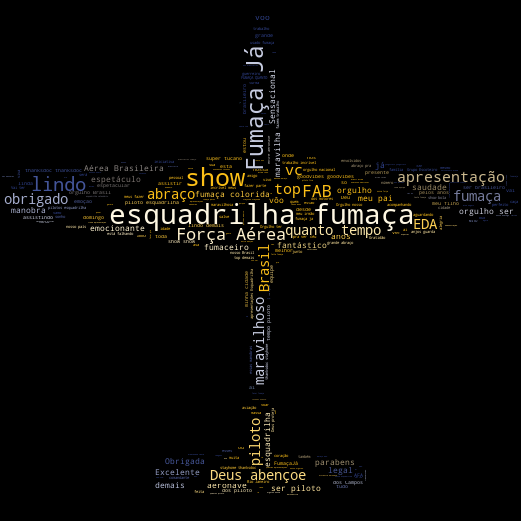

</center>
Se você gosta de *Data Science* ou quer aprender como criar uma imagem como esta, continue lendo este artigo.


##Construindo a *Wordcloud*

### Extraindo os dados do *chat*

Antes de iniciar a construção da *wordcloud* é necessário extrair os dados, em nosso caso as mensagens do *chat*.

Nesta fase utilizaremos o ["*chat replay downloader*"](https://github.com/xenova/chat-replay-downloader")

1- O primeiro passo é instalar os arquivo `requirements.txt` e `chat_replay_dowloader.py`  que podem ser encontrados na pasta do github do *chat replay downloader* 



In [ ]:
pip install -r requirements.txt

     |████████████████████████████████| 61kB 3.7MB/s 
     |████████████████████████████████| 245kB 9.0MB/s 


2- Muito embora seja possível tentar realizar o download diretamente para um arquivo de extensão `*.csv`, esta funcionalidade gerou diversos erros tanto no Colab como no Pycharm.

Optei então pela extração como lista (que não gera muitas dificuldades adicionais):

In [ ]:
import chat_replay_downloader
from chat_replay_downloader import *

youtube_messages = get_chat_replay("https://www.youtube.com/watch?v=GG8ZhClbI3E")

A saída de streaming foi truncada nas últimas 5000 linhas.
[1:14:42] jeferson appio: :clapping_hands::clapping_hands::clapping_hands::clapping_hands::clapping_hands:
[1:14:42] Igor Silva Cruz: Tem algum perigo esses pássaros voando aí perto das aeronaves?
[1:14:42] Elaine e José: Porque não utiliza fumaça COLORIDA? Campinas-SP
[1:14:42] Miguel Rocha: como fica armazenada tanta fumaça
[1:14:42] SIDNEI MANCILHA: fantástico.
[1:14:42] Rodrigo França: todos os pilotos sabem todas as manobras?
[1:14:44] Miguel Rocha: como fica armazenada tanta fumaça
[1:14:44] Jose Anderson: essa fumaça é a mesma daquela que os aviões comerciais liberam ????
[1:14:44] Luly Machado: esquadrilha tem um calendário oficial?
[1:14:44] max pires: abraços a todos os Traíras do grupo Sempre Perto. Macapá
[1:14:45] Mariana Viola: :thumbs_up:
[1:14:45] Nick Mayer: Waw
[1:14:45] Frederico Porto Souza: quem será que projetou o tucano?
[1:14:45] Marcelo Cezario: meu filho eh da FAB muito orgulho disso:virtualhug::washha

Foram extraídas 20.279 comentários no chat, retornados como uma lista de dicionários.



In [ ]:
print('Número de comentários no chat: ',len(youtube_messages)) 
print('Tipo do retorno de dados: ',type(youtube_messages))

Número de comentários no chat:  20279
Tipo do retrono de dados:  <class 'list'>


In [ ]:
print('Primeira mensagem: ')
print(youtube_messages[0])
print('Tipo de dado: ', type(youtube_messages[0]))

Primeira mensagem: 
{'message': 'São Vicente, céu de brigadeiro.', 'author': 'Adriano Lima', 'timestamp': 1589718697981526, 'author_id': 'UCi4-BN-1AEkZx5dd7lB2_KQ', 'time_text': '0:03', 'time_in_seconds': 3, 'video_offset_time_msec': 3085}
Tipo de dado:  <class 'dict'>


3- Passamos para a extração de todas as mensagens enviadas (valores da chave 'message' dos dicionários)

4- Aproveitamos para salvar as mensagens como *string* única para posterior utilização (messages_str)

Abaixo são apresentados os primeiros 120 caracteres dos 771.756 gerados com a concatenação e armazenados na varável `messages_str`.

In [ ]:
messages_str = ""
for msg in youtube_messages:
  messages_str += (msg.get('message') + " ")

print(messages_str[0:120])
print('Quantidade de caracteres de messages_str: ', len(messages_str))

São Vicente, céu de brigadeiro. BRASIL Bom dia a todos na expectativa deste grande evento de hoje fumaça jahhh Já estamo
Quantidade de caracteres de messages_str:  771756


5- Vamos gerar um arquivo `*.txt` para podermos arquivá-las, visando alguma outra utilização no futuro.

In [ ]:
with open('chat_live_eda.txt', 'w') as live:
  live.write(messages_str)
  live.close()

###Desenhando a Wordcloud

Agora as coisas começam a ficar divertidas!

Minha ideia era simples, eu queria extrair os sentimentos que a demonstração do EDA traz nas pessoas representadas pelos comentários do chat da Live. Que tal então transformar o A-29 do EDA nesta wordcloud?

Meu amigo Marcus Lemos, Relações Públicas da Esquadrilha da Fumaça, providenciou algumas imagens para que este projeto tomasse vida. A primeira era o modelo abaixo, que seria a base para a animação e para as demais imagens. A segunda imagem é a máscara para a forma e cores da *wordcloud*, reparem na simplificação de cores para deixar as palavras mais legíveis sem perder o simbolismo. 


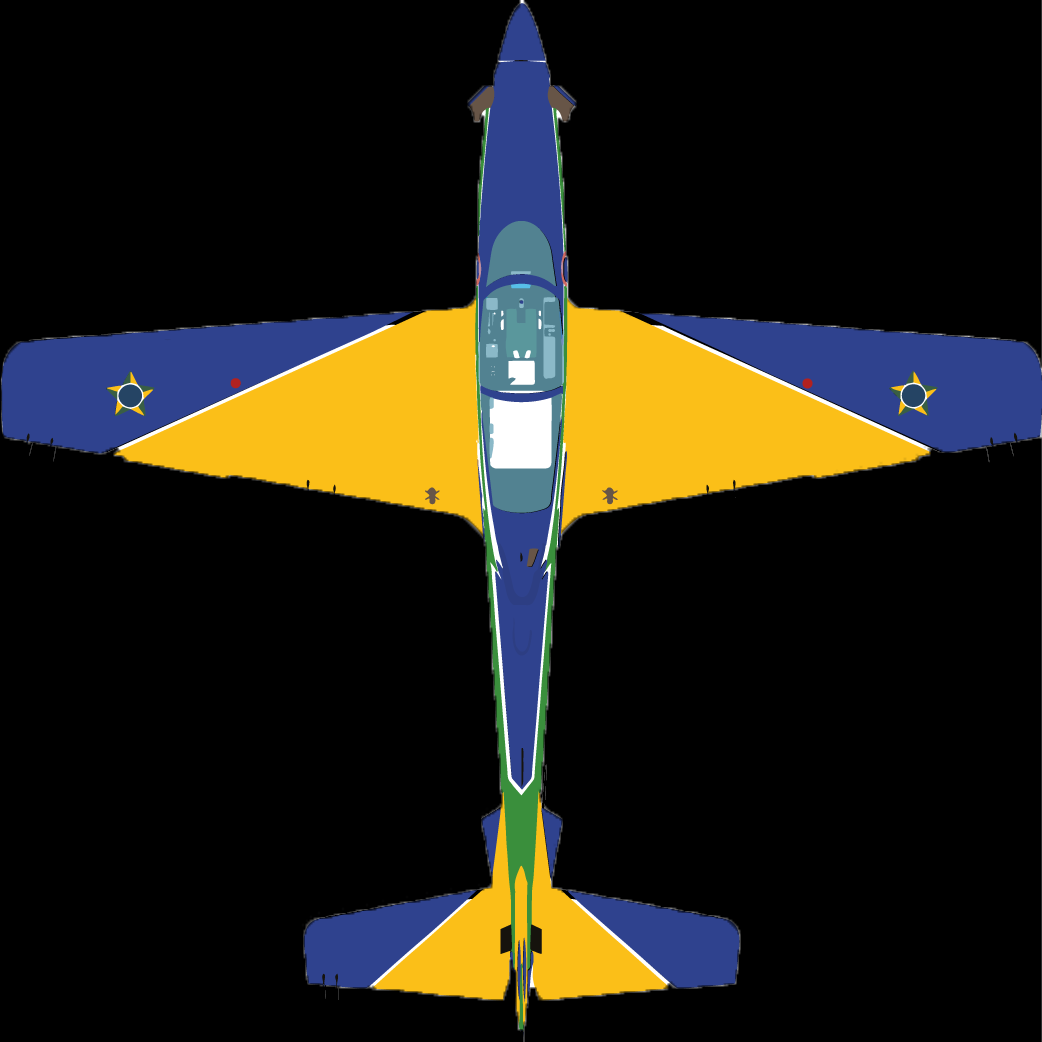

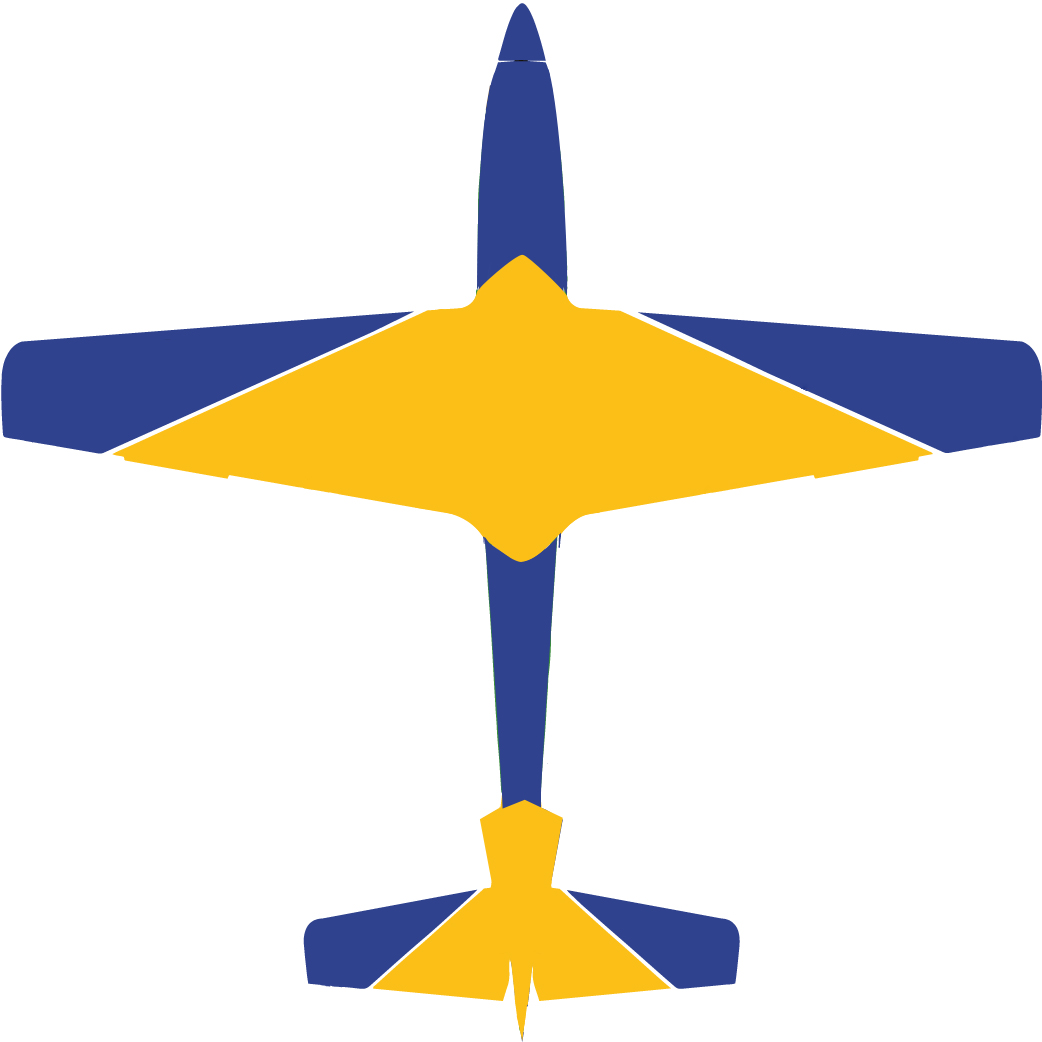

In [ ]:
from IPython.display import Image, display
display(Image('A-29_Barra_comdetalhes_fundopreto.png', width=400, height=400))
display(Image('A29 - Barra.jpg', width=400, height=400))

5- Vamos baixar a biblioteca `wordcloud` entre outras importações que serão necessárias.

---



In [ ]:
!pip install wordcloud -q

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as img
from scipy.ndimage import gaussian_gradient_magnitude



A partir deste momento serei um pouco menos didático nas explicações dos fundamentos da biblioteca `wordcloud`. Caso você nunca a tenha utilizado, recomendo [este artigo](https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/) do Carlos Melo como ponto de partida.

6- Defini algumas *stopwords* (palavras desconsideradas), grande parte delas por não representarem sentimentos e sim outros tipos de questionamentos ou expressões.

Para ser mais fidedigno ao padrão de pintura dos aviões da Fumaça, resolvi utilizar [*Image-colored wordcloud with boundary map*](https://amueller.github.io/word_cloud/auto_examples/parrot.html). Você pode conferir a documentação no link.

7- Defini uma máscara (descrita anteriormente).

8- Trabelhei parâmetros da máscara (subsample, mascaramento do branco e divisão entre as cores). Os valores foram escolhidos por meio dos resultados obtidos com diversos parâmetros.

9- Passei a definir os parâmetros da *wordcloud* como: número máximo de plavras, tamanho de fonte, cor de fundo, inserção das stopwords...). Novamente, os parâmetros foram ajustados em função da adequabilidade dos *outputs*

10 - Inseri as mensagens do *chat* para a geração da *wordcloud* (em string única). Entendeu agora o motivo de ter gerado uma string única? (Optei por recuperá-las do arquivo `*.txt`)

11- Ao gerar a *wordcloud* já podemos ver a forma que ela está tomando...

Vamos agora trabalhar as cores!


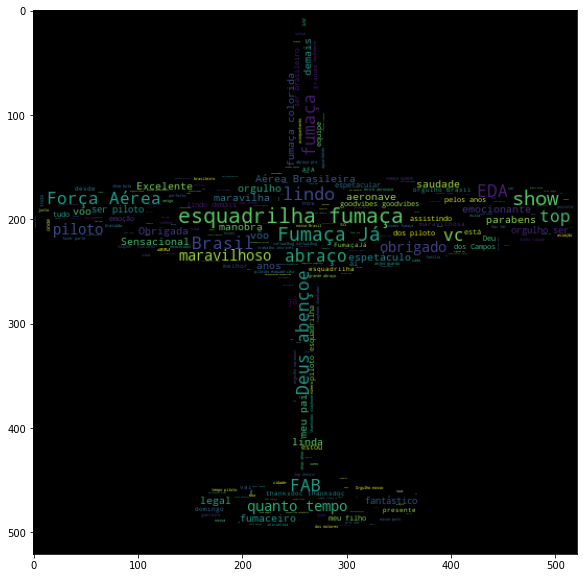

In [ ]:
# lista de stopword
stopwords = set(STOPWORDS)

# update de stopword
stopwords.update(['que', 'Parabén', 'Bom dia', 'washhands', 'Parabéns', 'apresentação',
                  'washhands washhands', 'isso', 'todo', 'meu pai', 'vc',
                  'os', 'muito', 'como', 'em', 'sempre', 'você', 'aqui', 'manda um', 'manda',
                  'ao', 'não', 'na', 'São José', 'de', 'um', 'esse', 'VC', 'dos campos', 'das', 'uma', 'eu',
                  'SP', 'pelo', 'pela' , 'para', 'Pirassununga', 'live', 'mai', 'VC', 'São', 'José', 'essa',
                  'ano', 'favor', 'por', 'qual', 'aos', 'hoje', 'sou', 'Vc', 'dia', 
                  'FORA', 'fora', 'fechado', 'todos', 'Bom', 'vocês', 'este', 'esta', 'mais', 
                  'estamos', 'MG', 'quando', 'ainda', 'dos Campos', 
                  'oi', 'tem', 'casa', 'foi', 'da', 'dos Campos', 
                  'Coronel'])

# Mask - máscara
# Observem que eu renomeei PIL >> Image como img devido ao conflito com IPython >> Image
a29_mask = np.array(img.open('/content/A29 - Barra.jpg'))

# Realizando o "subsample" da máscara (fator de 2)
a29_mask = a29_mask[::2, ::2]

# Criando uma máscara com o branco "mascarado"
a29_new_mask = a29_mask.copy()
a29_new_mask[a29_new_mask.sum(axis=2) == 0] = 10

# adicinando finesse: reforçando a divisão entre as cores.
# para isto utilizamos "edge detection"
edges = np.mean([gaussian_gradient_magnitude(a29_mask[:, :, i] / 255., 2) for i in range(2)], axis=0)
a29_new_mask[edges > .2] = 10

# Defininindo os parâmetros da wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(stopwords=stopwords, background_color="black", max_words=250,
               mask=a29_new_mask, 
               max_font_size=20, min_font_size=2,
               random_state=42, relative_scaling=0.2)

# Recuperando as mensagens do chat (arquivas em txt)
chat_msgs = open('chat_live_eda.txt', encoding="utf-8").read()


# Gerando a wordcloud - inserindo os textos
wc.generate(chat_msgs);
plt.figure(figsize=(10,10))
plt.imshow(wc)



###Colorindo a *WordCloud*

12- Na primeira parte desta subseção utilizaremos o `ImageColorGenerator` para fazer a *wordcloud* assumir este padrão de cores. Utilizando `wc.to_file` será gerado um arquivo de imagem.

13- Para você poder ver como funcionam a máscara e as bordas, as duas imagens são mostradas abaixo (alterando os seus parâmetros a *wordcloud* também é modificada de acordo.

Cada iteração gera imagens levemente diferentes, dadas as interpolações.

14- Agora é só modificar os parâmetros para as suas necessidades e salvar vários arquivos diferentes se você quiser!

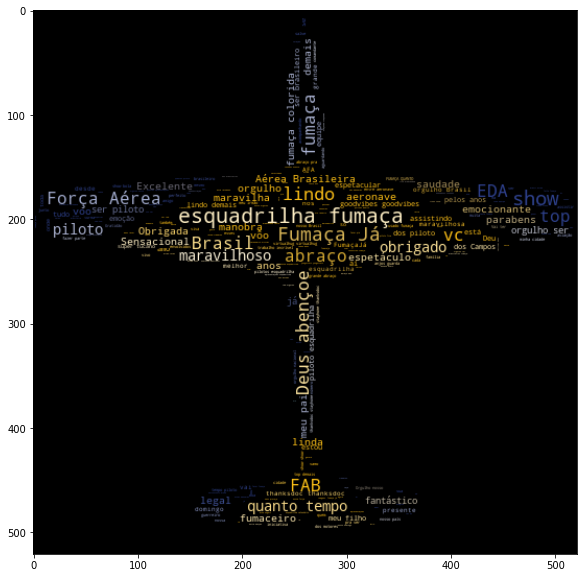

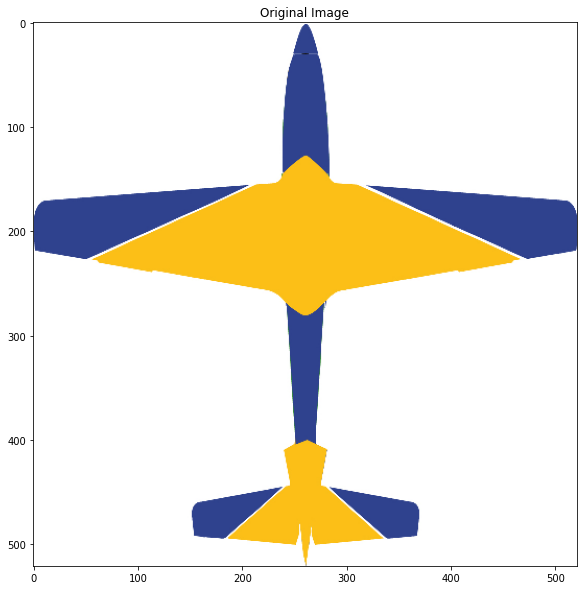

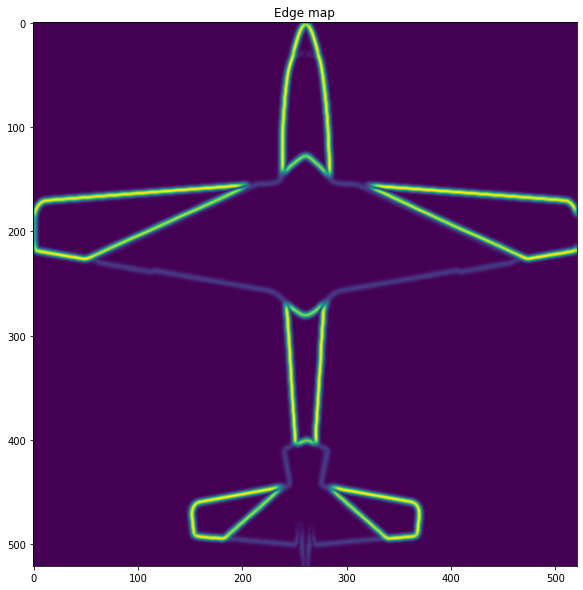

In [ ]:
# Crinado o colorido a partir da imagem (máscara)
image_colors = ImageColorGenerator(a29_new_mask)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("wordcloud_eda.png")

# Mostrando a máscara criada
plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(a29_new_mask)

# Mostrando o mapa de bordas criado
plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()

###Resultado Final

Gostou do resultado?

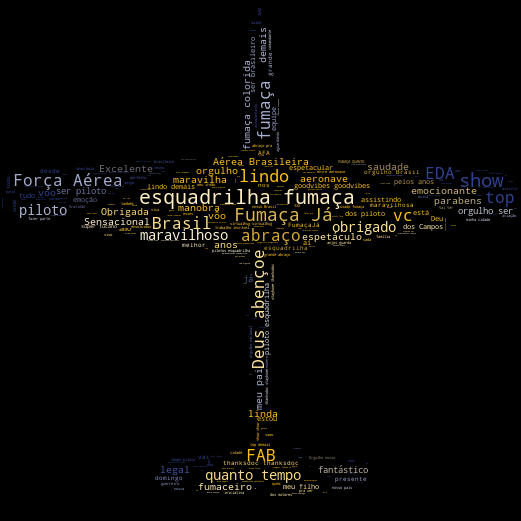

In [ ]:
Image('wordcloud_eda.png', width=700, height=700)

Lindo, top, fantástico, espetáculo, maravilhoso, excelente, emocionante, demais...a *wordcloud*? 
Talvez não! 

A apresentação da Esquadrilha da Fumaça? Com certeza, afirma o nosso público.

Agora é sua vez! Faça sua *wordcloud*, elas são ferramentas muito poderosas para representar palavras e sua frequência de utilização.

Se você tiver alguma sugestão de melhoria no artigo, entre em contato. 

Um grande abraço! Fumaça Já!